# P6: I mammiferi depongono uova?
I dataset Zoo fornisce una serie di dati relativi a diverse specie animali al fine di classificarle in 7 diverse
classi, ovvero:
 - mammiferi
 - uccelli
 - rettili
 - pesci 
 - anfibi 
 - insetti  
 - invertebrati
 
Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ogni specie animale, il
progetto mira a confrontare le diverse specie e raggruparle utilizzando diversi algoritmi di clustering.
Confrontando poi il risultato di ogni algoritmo, si intende mostrare quale algoritmo di clustering approssimi
meglio le classi fornite dal dataset.

# Il clustering 
Il clustering è una tecnica che consente di raggruppare oggetti in modo non supervisionato, cioè senza poter sfruttare esempi da utilizzare come base di apprendimento. Ogni raggruppamento, o cluster, rappresenta una classe di appartenenza.

Non avendo a disposizione esempi da cui imparare, il clustering sfrutta delle similarità tra i dati che deve analizzare, similarità che possono essere di varia natura ma che in sostanza definiscono una distanza tra i punti del dataset.

In [177]:
# Import library
import numpy as np                                
import pandas as pd                               

import seaborn as sns                             
import matplotlib.pyplot as plt                   
import sklearn as skl

from sklearn.decomposition import PCA
from sklearn import datasets                      
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics  
from scipy.cluster.hierarchy import dendrogram


In [178]:
# Import Datasets
zoo = pd.read_csv('zoo.csv')
cls = pd.read_csv('class.csv')

In [179]:
# Data inspection
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [180]:
# Class inspection 
cls

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [181]:
# Check if there is null data
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [182]:
# Data manupulation -> one hot encoder
oneh = pd.get_dummies(zoo.legs, prefix='legs')
df = zoo[[x for x in zoo.columns if x != 'legs']]
zoo = df.join(oneh)

In [183]:
# Data manupulation -> Delete unnecessary columns
labels_true = zoo['class_type'].to_numpy()
dataframe = zoo.drop(['animal_name', 'class_type'],axis=1)
dataframe

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0
6,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0
7,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0
8,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0


# K-means
Il K-means è uno degli algoritmi di clustering più diffuso e più performante. Nonostante ciò è un algoritmo semplicissimo da implementare ed utilizzare.
K-means si basa sui cosiddetti centroidi. Il centroide è un punto appartenente allo spazio delle features che media le distanze tra tutti i dati appartenenti al cluster ad esso associato. Rappresenta quindi una sorta di baricentro del cluster ed in generale, proprio per le sue caratteristiche, non è uno dei punti del dataset.

# DBSCAN

Il clustering basato sulla densità si riferisce a una delle metodologie di apprendimento non supervisionato più popolari utilizzate nella creazione di modelli e negli algoritmi di apprendimento automatico. I punti dati nella regione separati da due gruppi di bassa densità di punti sono considerati rumore (noise point). I dintorni con raggio ε di un dato oggetto sono conosciuti come ε dell'oggetto. Se l'intorno ε dell'oggetto comprende almeno un numero minimo, MinPts di oggetti, allora è chiamato oggetto core.

# Agglomerative Clustering

Il clustering gerarchico è utile non solo per suddividere i dati in gruppi, ma anche per capire le relazioni tra i gruppi. Uno dei vantaggi principali del clustering gerarchico è quello di non richiedere che il numero di cluster venga definito in anticipo.
Produce un insieme di cluster innestati organizzati come un albero gerarchico (dendogramma). 
Qualsiasi numero desiderato di cluster può essere ottenuto con un "taglio" del dendogramma al livello appropriato.

In [184]:
# Create cluster objects
n_clusters = 7
kmean = KMeans(n_clusters = n_clusters, random_state = 42)
dbscan = DBSCAN(eps=1.5, min_samples=3)
agglomerative = AgglomerativeClustering(n_clusters=3)
clustering_algorithms = (
        ("KMeans", kmean),
       ("DBSCAN", dbscan),
       ("Agglomerative Clustering", agglomerative)
    
)

In [185]:
# Evaluate clustering
rand_score = []
for name, algorithm in clustering_algorithms: 
    
        algorithm.fit(dataframe)    
        
        if hasattr(algorithm, "labels_"):       
            labs_predicted = algorithm.labels_.astype(int)
        else:
            labs_predicted = algorithm.predict(dataframe)     
           
        group1 = []
        group2 = []
        group3 = []
        group4 = []
        group5 = []
        group6 = []
        group7 = []

        for i in enumerate(labs_predicted):
            if(i[1] == 0):
                group1.append([zoo.iloc[i[0]].animal_name, cls.iloc[zoo.iloc[i[0]].class_type-1].Class_Type])
            elif(i[1] == 1):
                group2.append([zoo.iloc[i[0]].animal_name, cls.iloc[zoo.iloc[i[0]].class_type-1].Class_Type])
            elif(i[1] == 2):
                group3.append([zoo.iloc[i[0]].animal_name, cls.iloc[zoo.iloc[i[0]].class_type-1].Class_Type])
            elif(i[1] == 3):
                group4.append([zoo.iloc[i[0]].animal_name, cls.iloc[zoo.iloc[i[0]].class_type-1].Class_Type])
            elif(i[1] == 4):
                group5.append([zoo.iloc[i[0]].animal_name, cls.iloc[zoo.iloc[i[0]].class_type-1].Class_Type])
            elif(i[1] == 5):
                group6.append([zoo.iloc[i[0]].animal_name, cls.iloc[zoo.iloc[i[0]].class_type-1].Class_Type])
            else:
                group7.append([zoo.iloc[i[0]].animal_name, cls.iloc[zoo.iloc[i[0]].class_type-1].Class_Type])

            
        print(name)
        print("Rand Score:")
        rand_score.append(metrics.rand_score(labels_true, labs_predicted))
        print(metrics.rand_score(labels_true, labs_predicted))
        print("True Labels:")
        print(labels_true)
        print("Predicted Labels:")
        print(labs_predicted)
        print("\n")
#        df1 = pd.DataFrame(group1)
#        df2 = pd.DataFrame(group2)
#        df3 = pd.DataFrame(group3)
#        df4 = pd.DataFrame(group4)
#        df5 = pd.DataFrame(group5)
#        df6 = pd.DataFrame(group6)
#        df7 = pd.DataFrame(group7)
        
#        display(pd.concat([df1, df2, df3, df4, df5,df6, df7], axis=1)

KMeans
Rand Score:
0.9106930693069307
True Labels:
[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]
Predicted Labels:
[5 5 1 5 5 5 5 1 1 5 5 2 1 6 6 6 2 5 1 1 2 2 5 2 4 3 3 0 5 0 4 5 0 2 1 5 5
 2 1 4 4 2 4 2 5 5 6 5 5 5 5 4 3 6 5 5 2 2 2 2 1 1 3 5 5 5 1 5 5 5 5 2 4 1
 1 0 1 6 2 2 3 4 1 2 0 6 1 2 4 3 3 3 1 0 5 2 0 4 5 4 2]


DBSCAN
Rand Score:
0.9522772277227722
True Labels:
[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]
Predicted Labels:
[ 0  0  1  0  0  0  0  1  1  0  0  2  1  3  4  4  2  0  1  5  2  2  0  2
  3  6  6  0  0  0  3  0  0  2  1  0  0  2  1  3  3  2  3  2  0  0  4  0
  0  0  0  3  6 -1  0  0  2  2  2  2  1  1  6  0  0  0  5  0  0  0  0  2
 -1  1  5 -1 -1  3  2  

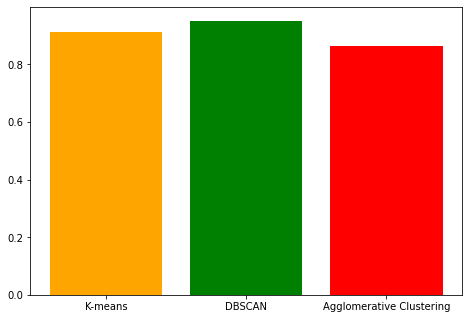

In [188]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['K-means','DBSCAN', 'Agglomerative Clustering'],rand_score, color=['orange', 'green', 'red'])
plt.show()

In [189]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [190]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(dataframe)

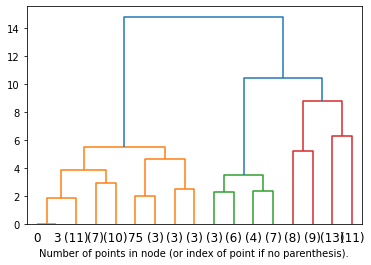

In [191]:
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [192]:
#PCA
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'breathes', 'venomous', 'fins', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8', 'tail', 'domestic','catsize']
x = dataframe.loc[:, features].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, zoo[['class_type']]], axis = 1)

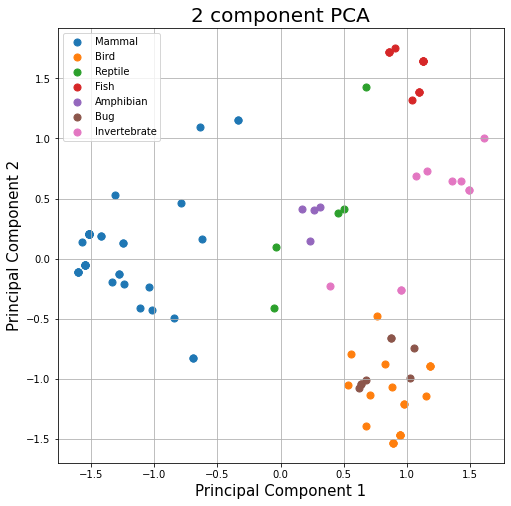

In [193]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 6, 7]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class_type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate'])
ax.grid()